In [1]:
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm_notebook as tq
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# SPECIFY PATH TO EVAL RESULTS DATA HERE
d = '/Users/jaredlorince/Desktop/temp_data/eval_wos/100-5-5/'

In [3]:
all_cats = sorted(['Environmental Sciences', 'Chemistry, Analytical', 'Oncology','Psychology, Developmental','Hospitality, Leisure, Sport & Tourism','Chemistry, Multidisciplinary', 'Astronomy & Astrophysics','Biotechnology & Applied Microbiology', 'Chemistry, Organic','Pharmacology & Pharmacy', 'Virology','Cardiac & Cardiovascular Systems', 'Ophthalmology','Marine & Freshwater Biology', 'Chemistry, Physical','Biochemistry & Molecular Biology', 'Clinical Neurology','Dermatology', 'Surgery', 'Physics, Multidisciplinary','Medical Laboratory Technology', 'Multidisciplinary Sciences','Nuclear Science & Technology', 'Medicine, General & Internal','Materials Science, Multidisciplinary', 'Engineering, Chemical','Computer Science, Information Systems', 'Mathematics','Medicine, Research & Experimental', 'Biodiversity Conservation','Urology & Nephrology', 'Dentistry, Oral Surgery & Medicine','Fisheries', 'Geochemistry & Geophysics', 'Physics, Mathematical','Veterinary Sciences', 'Physics, Atomic, Molecular & Chemical','Engineering, Environmental', 'Polymer Science', 'Plant Sciences','Chemistry, Inorganic & Nuclear', 'Engineering, Biomedical','Meteorology & Atmospheric Sciences', 'Endocrinology & Metabolism','Psychology, Multidisciplinary', 'Mathematics, Applied','Physics, Condensed Matter', 'Immunology', 'Cell Biology','Microbiology', 'Electrochemistry', 'Neurosciences', 'Acoustics','Public, Environmental & Occupational Health','Computer Science, Theory & Methods', 'Otorhinolaryngology','Genetics & Heredity', 'Physiology', 'Paleontology', 'Optics','Zoology', 'Agronomy', 'Psychology, Clinical', 'Mineralogy','Rehabilitation', 'Engineering, Mechanical','Statistics & Probability', 'Critical Care Medicine','Nutrition & Dietetics', 'Pathology', 'Ecology', 'Allergy','Biochemical Research Methods', 'Rheumatology','Metallurgy & Metallurgical Engineering', 'Physics, Applied','Economics', 'Crystallography', 'Materials Science, Ceramics','Psychology, Experimental', 'Pediatrics','Agricultural Engineering','Radiology, Nuclear Medicine & Medical Imaging','Gastroenterology & Hepatology', 'Education & Educational Research','Engineering, Aerospace', 'Physics, Particles & Fields','Behavioral Sciences', 'Agriculture, Multidisciplinary','Engineering, Electrical & Electronic','Peripheral Vascular Disease', 'Food Science & Technology','Mechanics', 'Anesthesiology', 'Engineering, Multidisciplinary','Business, Finance', 'Hematology', 'Computer Science, Cybernetics','Business', 'Computer Science, Interdisciplinary Applications','Infectious Diseases', 'Geography', 'Andrology','Instruments & Instrumentation', 'Psychology, Biological','Gerontology', 'Thermodynamics','Education, Scientific Disciplines', 'Entomology', 'Family Studies','Agriculture, Dairy & Animal Science', 'Developmental Biology','Psychology, Educational', 'Oceanography', 'Parasitology','Spectroscopy', 'Biophysics', 'Anatomy & Morphology','Chemistry, Applied', 'Computer Science, Software Engineering','Obstetrics & Gynecology', 'Nursing', 'Substance Abuse','Psychology', 'Mathematical & Computational Biology','Audiology & Speech-Language Pathology', 'Psychology, Social','Medicine, Legal', 'Geosciences, Multidisciplinary', 'Orthopedics','Political Science', 'Psychology, Applied', 'Biology', 'Psychiatry','Chemistry, Medicinal', 'Emergency Medicine', 'Horticulture','Forestry', 'Education, Special', 'Management','Reproductive Biology', 'Physics, Fluids & Plasmas','Physics, Nuclear', 'Ornithology', 'History', "Women's Studies",'Art', 'Computer Science, Hardware & Architecture','Social Sciences, Interdisciplinary','Agricultural Economics & Policy', 'Mycology','Operations Research & Management Science', 'Respiratory System','Soil Science', 'Remote Sensing', 'Ethics', 'Geology', 'Microscopy','Law', 'Automation & Control Systems', 'Psychology, Mathematical','Transplantation', 'Sociology', 'Geriatrics & Gerontology','Literature', 'Toxicology', 'Materials Science, Paper & Wood','Materials Science, Coatings & Films', 'Engineering, Civil','Health Care Sciences & Services','Information Science & Library Science','Materials Science, Composites', 'Sport Sciences','Construction & Building Technology', 'Linguistics', 'Anthropology','Tropical Medicine', 'Computer Science, Artificial Intelligence','Criminology & Penology', 'Demography', 'Geography, Physical','Nanoscience & Nanotechnology', 'Primary Health Care','Social Work', 'Engineering, Geological','Engineering, Manufacturing', 'Environmental Studies', 'Limnology','Communication', 'Health Policy & Services','Language & Linguistics', 'Planning & Development', 'Social Issues','Public Administration','Mathematics, Interdisciplinary Applications','History & Philosophy Of Science', 'Psychology, Psychoanalysis','Water Resources', 'Engineering, Industrial','Energy & Fuels','Materials Science, Characterization & Testing','Engineering, Ocean', 'Materials Science, Textiles', 'Archaeology','Imaging Science & Photographic Technology','Industrial Relations & Labor', 'Classics', 'Philosophy','Social Sciences, Mathematical Methods', 'Robotics', 'Music','Area Studies', 'Telecommunications', 'Engineering, Marine','Literature, American', 'Literature, German, Dutch, Scandinavian','Evolutionary Biology', 'International Relations', 'Ergonomics','Folklore', 'Humanities, Multidisciplinary','Literature, British Isles', 'Religion', 'Film, Radio, Television','Transportation', 'Integrative & Complementary Medicine','Medieval & Renaissance Studies', 'History Of Social Sciences','Literature, Slavic', 'Literature, Romance', 'Ethnic Studies','Architecture', 'Cultural Studies', 'Literary Theory & Criticism','Urban Studies', 'Materials Science, Biomaterials', 'Poetry','Literary Reviews', 'Asian Studies','Literature, African, Australian, Canadian', 'Theater', 'Logic','Mining & Mineral Processing', 'Cell & Tissue Engineering','Transportation Science & Technology', 'Engineering, Petroleum','Dance', 'Social Sciences, Biomedical', 'Medical Informatics','Medical Ethics', 'Neuroimaging'])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
bins = np.arange(0,2,.01)

(0, 0.07486719583333333)

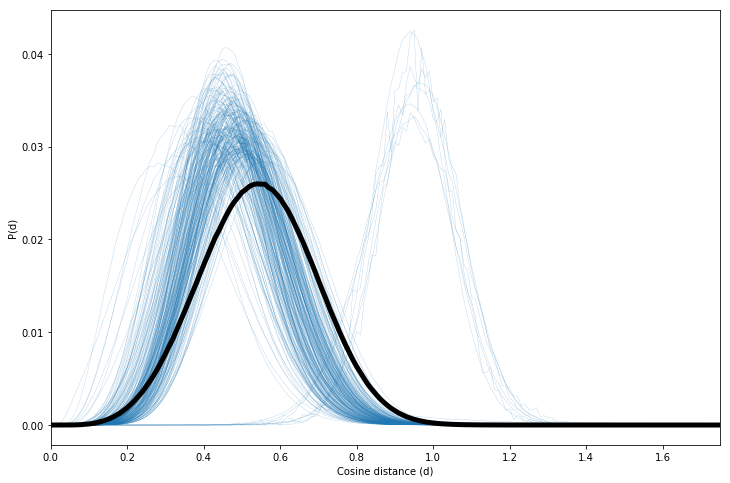

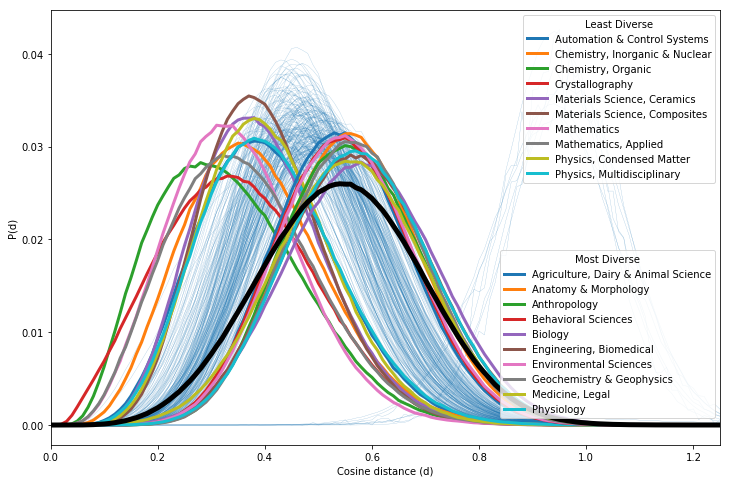

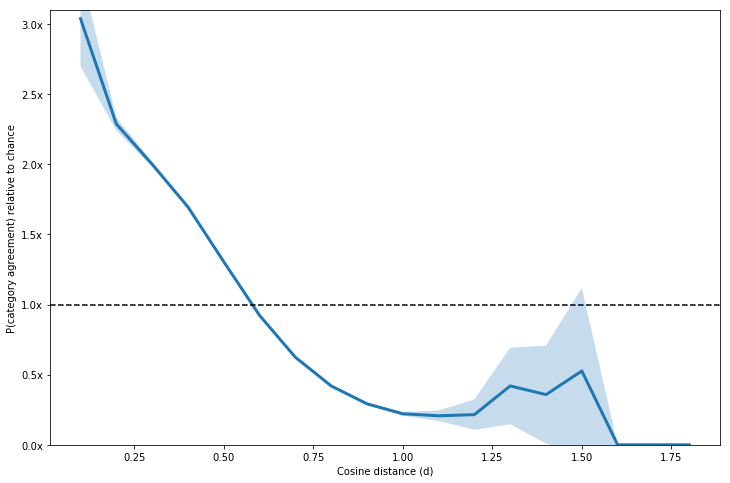

In [16]:
df = pd.read_pickle(d+'acc_df.pkl')
cat_results_binned = pickle.load(open(d+'cat_results_binned.pkl','rb'))

# get the top10 least diverse and top10 most diverse fields
# I exclude the last few weird, outlier ones, using [-18:-8] instead of [-10:]
least_diverse = np.argsort([cat_results_binned[i].argmax() for i in range(251)])[:10]
most_diverse = np.argsort([cat_results_binned[i].argmax() for i in range(251)])[-18:-8] 


###### By category distribution plot

fig,ax = plt.subplots(1,1,figsize=(12,8))
bins = np.arange(0,2,.01)
for r in range(251):
    ax.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=.25,c=colors[0],alpha=0.5)
vals = np.histogram(df.dist,bins=bins)[0]
ax.plot(bins[:-1],vals/vals.sum(),lw=5,c='k',label='randomly sampled pairs')
ax.set_xlabel('Cosine distance (d)')
ax.set_ylabel('P(d)')
ax.set_xlim(0,1.75)

###### By category distribution plot, with most/least diverse fields highlighted 

fig,ax = plt.subplots(1,1,figsize=(12,8))
bins = np.arange(0,2,.01)
for r in range(251):
    if all_cats[r] not in list(least_diverse)+list(most_diverse):
        ax.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=.25,c=colors[0],alpha=0.5)
lines_a = []
lines_b = []
for r in range(251):
    if r in list(least_diverse):
        lines_a += ax.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=3,label=all_cats[r])
for r in range(251):
    if r in list(most_diverse):
        lines_b += ax.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=3,label=all_cats[r])

vals = np.histogram(df.dist,bins=bins)[0]
ax.plot(bins[:-1],vals/vals.sum(),lw=5,c='k',label='randomly sampled pairs')
first_legend = ax.legend(handles=lines_a,loc='upper right',title='Least Diverse')# bbox_to_anchor=(1.25,1))
ax.add_artist(first_legend)
# Create another legend for the second line.
ax.legend(handles=lines_b, loc='lower right',bbox_to_anchor=(1,0.05),title='Most Diverse')
ax.set_xlabel('Cosine distance (d)')
ax.set_ylabel('P(d)')
ax.set_xlim(0,1.25)

###### P(category agreement) vs. distance plot

fig,ax = plt.subplots(1,1,figsize=(12,8))
bins = np.arange(0,2,.1)
m = df.groupby(np.digitize(df.dist,bins=bins)).agree.mean() 
ci = df.groupby(np.digitize(df.dist,bins=bins)).agree.apply(lambda x: 1.96 * np.std(x)/np.sqrt(len(x)))
x = bins[m.index]
ax.plot(x,m.values,lw=3)x
ax.fill_between(x,m+ci,m-ci,alpha=.25)
ax.set_xlabel('Cosine distance (d)')
ax.set_ylabel('P(category agreement) relative to chance');
ax.axhline(df.agree.mean(),c='k',ls='--')
ax.set_yticks(np.arange(0,3.1,.5)*df.agree.mean())
ax.set_yticklabels(["{}x".format(t) for t in np.arange(0,3.1,.5)])
ax.set_ylim(0,3.1*df.agree.mean())


